In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
INTERIM_DATA_DIR = "../data/interim/"
PROCESSED_DATA_DIR = "../data/processed/"

In [65]:
df_filtered = pd.read_csv(f"{INTERIM_DATA_DIR}2_nonmissing_annual_averages.csv")

### Visualization of Field Amount Across Years

Here, we visualized how many fields have data across the years. From the first plot, we observe that almost all years have a similar number of fields with data.

In the second plot, we see that most fields have information for only one year. As the number of years increases, the number of fields with data decreases significantly. This highlights that fields with multi-year data are relatively rare in the dataset.

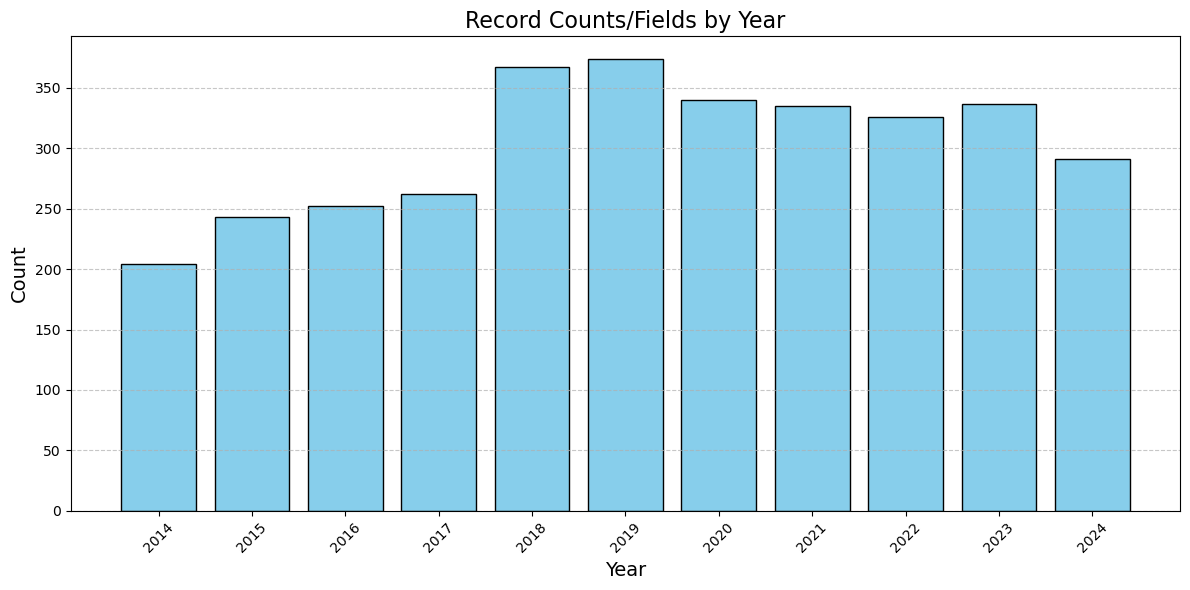

In [68]:
year_counts = df_filtered['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black')

plt.title('Record Counts/Fields by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(year_counts.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

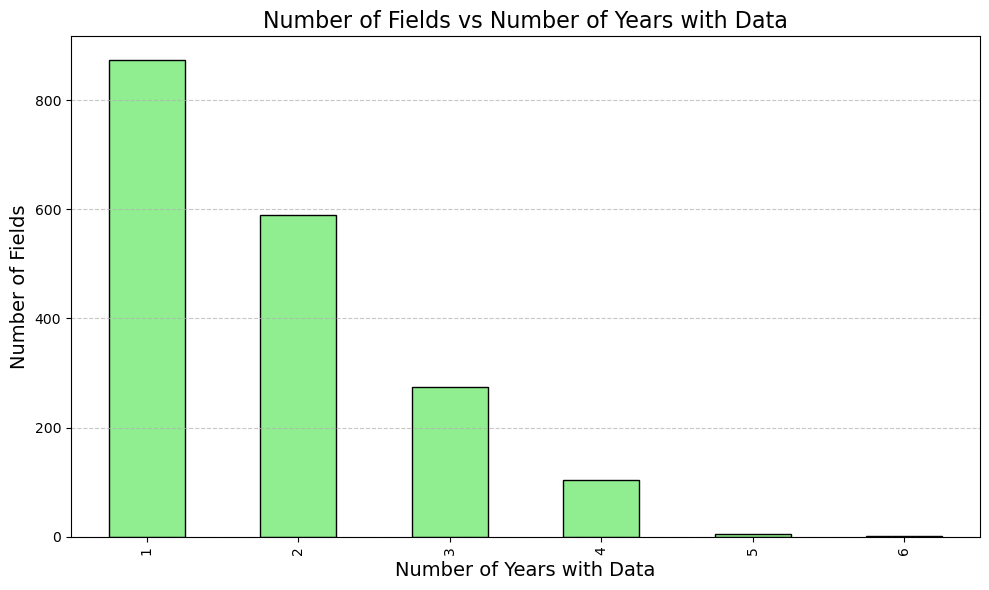

In [70]:
years_per_field = df_filtered.groupby('field_fvid')['year'].nunique()
fields_per_year_count = years_per_field.value_counts().sort_index()

plt.figure(figsize=(10, 6))
fields_per_year_count.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Fields vs Number of Years with Data', fontsize=16)
plt.xlabel('Number of Years with Data', fontsize=14)
plt.ylabel('Number of Fields', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Investigating (more close) the Winter_temp_variability parameter

In [76]:
df = pd.read_csv(f"{PROCESSED_DATA_DIR}final_data_for_modeling.csv")
print(df.shape)
df['abd'] = (df['cpba_count']+df['cpbl_count'])/2 

(3266, 27)


In [78]:
df.columns

Index(['grower', 'farm', 'field', 'field_fvid', 'lat', 'lng', 'year', 'gdd',
       'cpba_count', 'cpba_value', 'cpbl_count', 'cpbl_value', 'cum_gdd',
       'croptype', 'wei_prop', 'wei_intensity', 'summer_avg_temp',
       'summer_hottest_temp', 'summer_avg_percip',
       'summer_heavy_rainfall_days', 'summer_temp_variability',
       'winter_coldest_temp', 'winter_heavy_rainfall_days',
       'winter_temp_variability', 'winter_warm_day_count',
       'winter_extreme_cold_days', 'spring_frost_free_days', 'abd'],
      dtype='object')

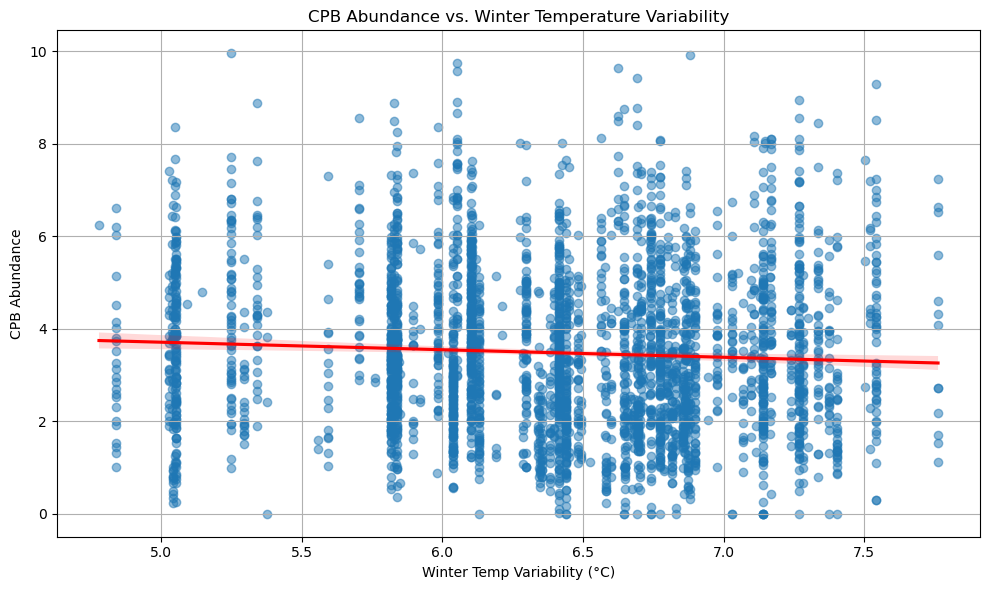

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(data=df, 
            x='winter_temp_variability', 
            y='abd', 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color': 'red'})
plt.title('CPB Abundance vs. Winter Temperature Variability')
plt.xlabel('Winter Temp Variability (°C)')
plt.ylabel('CPB Abundance')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/zp/r3p5skms0k50v110tgsl6plw0000gn/T/ipykernel_32082/1594655607.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


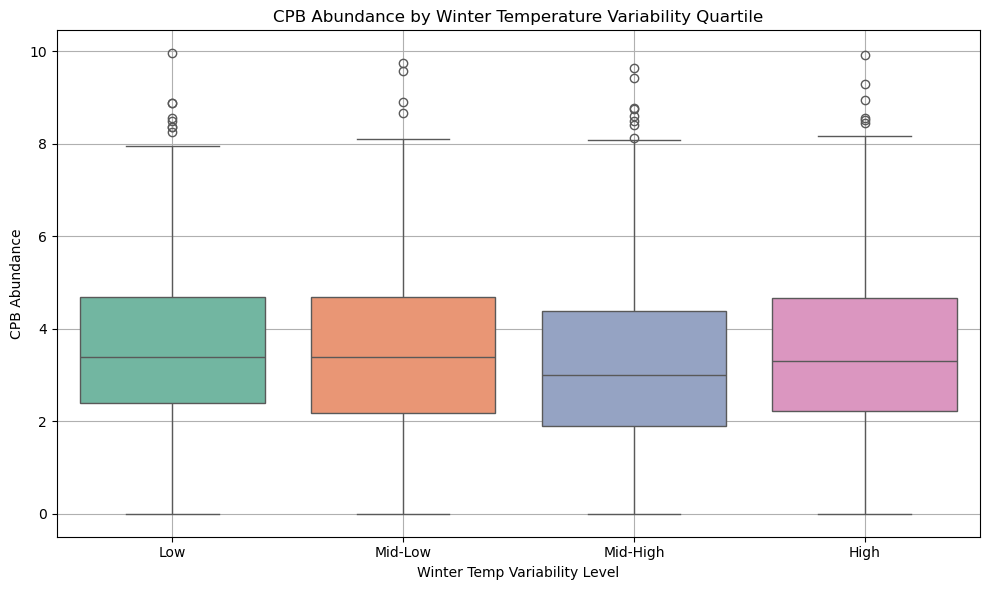

In [82]:
# Create variability quartiles
df['var_quartile'] = pd.qcut(df['winter_temp_variability'], 4, labels=["Low", "Mid-Low", "Mid-High", "High"])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, 
            x='var_quartile', 
            y='abd', 
            palette='Set2')
plt.title('CPB Abundance by Winter Temperature Variability Quartile')
plt.xlabel('Winter Temp Variability Level')
plt.ylabel('CPB Abundance')
plt.grid(True)
plt.tight_layout()
plt.show()

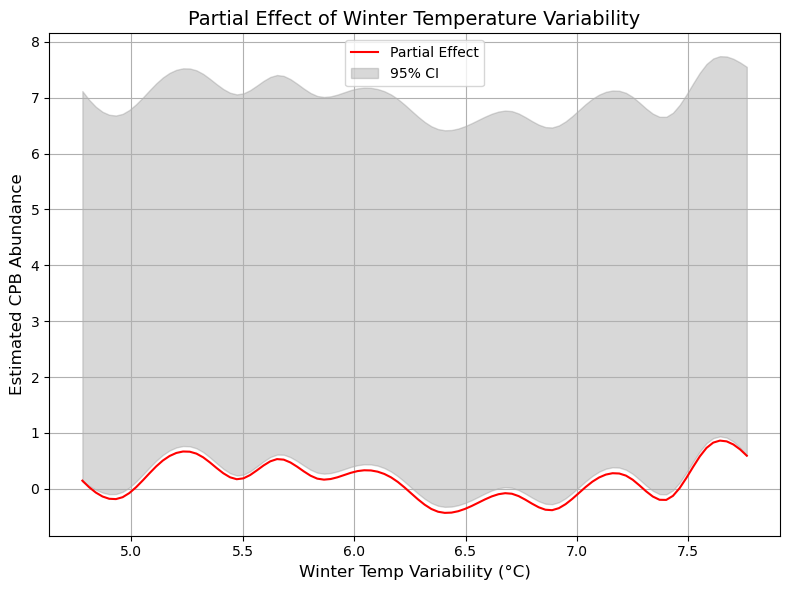

In [84]:
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = df[['winter_temp_variability']].values
y = df[['abd']].values.ravel()

# Fit the model
gam = LinearGAM(s(0)).fit(X, y)

# Generate grid and predictions
XX = gam.generate_X_grid(term=0)
partial_dep = gam.partial_dependence(term=0, X=XX)
conf_int = gam.prediction_intervals(X=XX, width=0.95)

# Plot with confidence interval
plt.figure(figsize=(8, 6))
plt.plot(XX, partial_dep, color='red', label='Partial Effect')
plt.fill_between(XX[:, 0], conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.3, label='95% CI')
plt.title("Partial Effect of Winter Temperature Variability", fontsize=14)
plt.xlabel("Winter Temp Variability (°C)", fontsize=12)
plt.ylabel("Estimated CPB Abundance", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

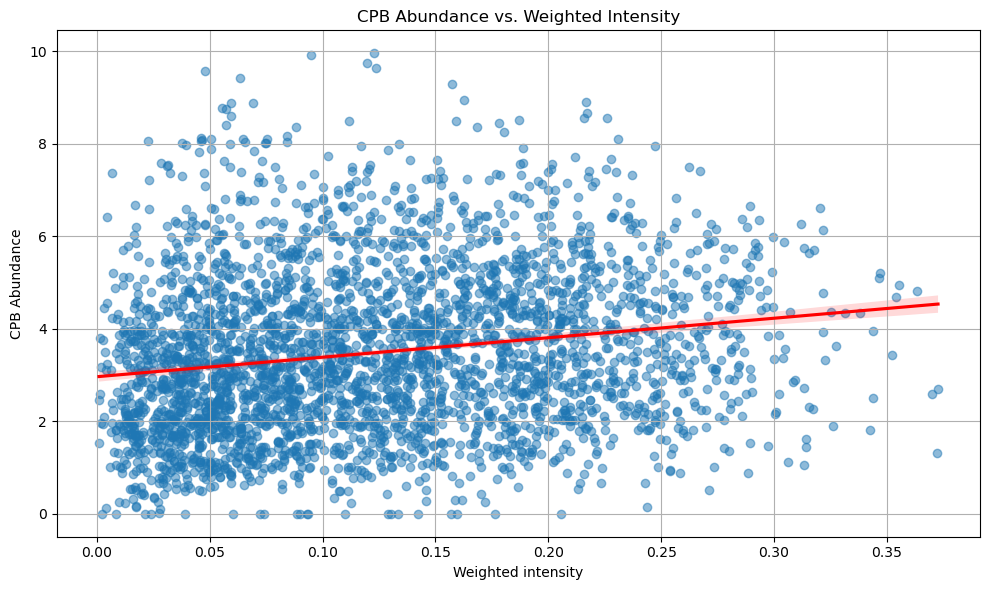

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(data=df, 
            x='wei_intensity', 
            y='abd', 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color': 'red'})
plt.title('CPB Abundance vs. Weighted Intensity')
plt.xlabel('Weighted intensity')
plt.ylabel('CPB Abundance')
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
top10_farms = df.sort_values(by='winter_temp_variability', ascending=False).head(10)
print(top10_farms[['farm', 'winter_temp_variability', 'abd']])

                 farm  winter_temp_variability       abd
1225           Monday                 7.762572  5.590909
1231           Monday                 7.762572  4.082168
967   Signature Farms                 7.762572  1.533929
1269  Signature Farms                 7.762572  1.696429
1228           Monday                 7.762572  6.526923
1227           Monday                 7.762572  6.633929
1264  Signature Farms                 7.762572  2.723810
1074         Joe Seis                 7.762572  2.177500
1107  Signature Farms                 7.762572  1.111264
1226           Monday                 7.762572  7.250000
